# Glassdoor ML Challenge

The problem of interest is the prediction of apply rate. Imagine a user visiting Glassdoor, and
performing a job search. From the set of displayed results, user clicks on certain ones that she is
interested in, and after checking job descriptions, she further clicks on apply button therein to land in
to an application page. The apply rate is defined as the fraction of applies (after visiting job description
pages), and the goal is to predict this metric using the dataset described in the following section.

# Import dependency libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

import sys
import pandas as pd
import numpy as np
import time
import seaborn as sns

# Import learning algorithms

In [2]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

# Data analysis

In [3]:
filename = "data.csv"
data = pd.read_csv(filename)

In [4]:
data.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,u_id,mgoc_id
0,0.000000,0.198377,0.000000,0.022545,0.014706,1.0,16.0,0,2018-01-24,5f42afe6-e7d0-4822-b95e-57ae0682fa24,10148
1,0.000000,0.000000,9.308552,0.005782,0.000003,-1.0,0.0,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
2,0.000000,0.000000,9.308552,0.005782,0.000003,-1.0,0.0,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
3,11.992127,0.118237,3.462835,0.017337,0.050844,0.0,23.0,0,2018-01-25,5f562c30-b0ad-45ec-9427-145624e0f34b,10039
4,8.298727,0.000000,0.000000,0.019160,0.018750,1.0,0.0,0,2018-01-23,5f5991c5-253f-4d30-aad1-2abfe9d50de3,-1


In [5]:
data.sample(10)

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,u_id,mgoc_id
9919,0.00000,0.000000,0.000000,0.025000,0.025000,-1.0,13.0,0,2018-01-23,df8f4031-4270-4987-9e1e-7a62c3d98249,10094
656557,0.00000,0.000000,0.000000,0.015149,0.006539,1.0,4.0,0,2018-01-26,37d27acf-0a3b-4bd5-a4ae-5c88e963bea6,10076
518303,0.00000,0.000000,2.032031,0.021975,0.021739,1.0,5.0,0,2018-01-27,619eeab6-c9fd-4c10-9b44-cc8a192ec812,10082
1105715,0.00000,0.000000,1.400169,0.021113,0.018844,-1.0,5.0,0,2018-01-23,2223c37a-27d2-4646-8950-cecdd9a98f35,10049
897586,0.00000,0.000000,0.000000,0.019898,0.204696,-1.0,1.0,0,2018-01-22,96405325-1a48-4cb7-a7b2-e69cab63ecc3,10132
1063916,0.00000,0.139363,0.000000,0.016066,0.017663,1.0,0.0,1,2018-01-24,19078fa9-6bee-4930-bb99-dbf80b8738ae,10035
968517,0.00000,0.000000,0.000000,0.017048,0.030249,0.0,1.0,0,2018-01-25,0,10047
417443,28.76118,0.767095,0.000000,0.020824,0.093570,-1.0,1.0,0,2018-01-24,c0390235-8f0c-4b15-9dcd-99ecebe7c813,10129
389637,0.00000,0.000000,0.000000,0.018145,0.015468,1.0,3.0,0,2018-01-27,46dae31b-d519-4fbc-9892-2bcf6215e0c5,10048
112038,0.00000,0.798057,0.063518,0.014972,0.012726,1.0,21.0,0,2018-01-25,66788599-7f86-4aaf-b701-9ae3a1f1b344,10068


In [6]:
data.describe()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,mgoc_id
count,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06
mean,4.651058e+00,7.590343e-02,1.770301e+00,1.711024e-02,3.580456e-02,2.296164e-01,1.010130e+01,8.993580e-02,9.926553e+03
std,8.990293e+00,2.556142e-01,2.237259e+00,1.220871e-02,4.886690e-02,7.772824e-01,1.738912e+01,2.860899e-01,1.228172e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-06,9.998021e-07,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.063830e-02,1.256780e-02,0.000000e+00,2.000000e+00,0.000000e+00,1.003900e+04
50%,0.000000e+00,0.000000e+00,2.509947e-01,1.578868e-02,2.066189e-02,0.000000e+00,6.000000e+00,0.000000e+00,1.008200e+04
75%,3.375564e+00,4.257227e-02,3.423265e+00,2.043710e-02,3.760018e-02,1.000000e+00,1.400000e+01,0.000000e+00,1.012000e+04
max,9.351672e+01,7.301161e+00,1.774189e+01,2.556893e-01,1.294088e+00,1.000000e+00,1.340000e+03,1.000000e+00,1.015700e+04


In [7]:
data.isnull().sum()#to check for missing values

title_proximity_tfidf          0
description_proximity_tfidf    0
main_query_tfidf               0
query_jl_score                 0
query_title_score              0
city_match                     0
job_age_days                   0
apply                          0
search_date_pacific            0
u_id                           0
mgoc_id                        0
dtype: int64

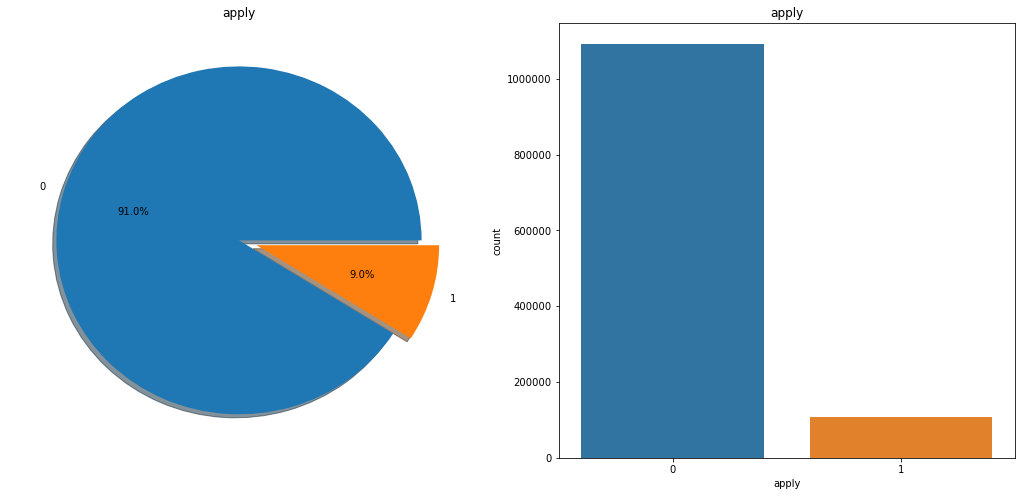

In [8]:
# how many applied
f,ax=plt.subplots(1,2,figsize=(18,8))
data['apply'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('apply')
ax[0].set_ylabel('')
sns.countplot('apply',data=data,ax=ax[1])
ax[1].set_title('apply')
plt.show()

In [9]:
#normalize
data["title_proximity_tfidf"] = data["title_proximity_tfidf"]/data["title_proximity_tfidf"].max()
data["description_proximity_tfidf"] = data["description_proximity_tfidf"]/data["description_proximity_tfidf"].max()
data["main_query_tfidf"] = data["main_query_tfidf"]/data["main_query_tfidf"].max()
data["query_jl_score"] = data["query_jl_score"]/data["query_jl_score"].max()
data["query_title_score"] = data["query_title_score"]/data["query_title_score"].max()
data["city_match"] = data["city_match"]/data["city_match"].max()
data["job_age_days"] = data["job_age_days"]/data["job_age_days"].max()
data.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,u_id,mgoc_id
0,0.000000,0.027171,0.000000,0.088175,0.011364,1.0,0.011940,0,2018-01-24,5f42afe6-e7d0-4822-b95e-57ae0682fa24,10148
1,0.000000,0.000000,0.524665,0.022615,0.000002,-1.0,0.000000,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
2,0.000000,0.000000,0.524665,0.022615,0.000002,-1.0,0.000000,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
3,0.128235,0.016194,0.195178,0.067804,0.039289,0.0,0.017164,0,2018-01-25,5f562c30-b0ad-45ec-9427-145624e0f34b,10039
4,0.088741,0.000000,0.000000,0.074936,0.014489,1.0,0.000000,0,2018-01-23,5f5991c5-253f-4d30-aad1-2abfe9d50de3,-1


In [10]:
#data imputation with mean values in place of 0s
modified_data = data
modified_data.loc[data.title_proximity_tfidf == 0, 'title_proximity_tfidf'] = data["title_proximity_tfidf"].mean()
modified_data.loc[data.description_proximity_tfidf == 0, 'description_proximity_tfidf'] = data["description_proximity_tfidf"].mean()
modified_data.loc[data.main_query_tfidf == 0, 'main_query_tfidf'] = data["main_query_tfidf"].mean()
modified_data.loc[data.query_jl_score == 0, 'query_jl_score'] = data["query_jl_score"].mean()
modified_data.loc[data.query_title_score == 0, 'query_title_score'] = data["query_title_score"].mean()
modified_data.loc[data.city_match == 0, 'city_match'] = data["city_match"].mean()
modified_data.loc[data.job_age_days == 0, 'job_age_days'] = data["job_age_days"].mean()
modified_data.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,u_id,mgoc_id
0,0.049735,0.027171,0.099781,0.088175,0.011364,1.000000,0.011940,0,2018-01-24,5f42afe6-e7d0-4822-b95e-57ae0682fa24,10148
1,0.049735,0.010396,0.524665,0.022615,0.000002,-1.000000,0.007538,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
2,0.049735,0.010396,0.524665,0.022615,0.000002,-1.000000,0.007538,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
3,0.128235,0.016194,0.195178,0.067804,0.039289,0.229616,0.017164,0,2018-01-25,5f562c30-b0ad-45ec-9427-145624e0f34b,10039
4,0.088741,0.010396,0.099781,0.074936,0.014489,1.000000,0.007538,0,2018-01-23,5f5991c5-253f-4d30-aad1-2abfe9d50de3,-1


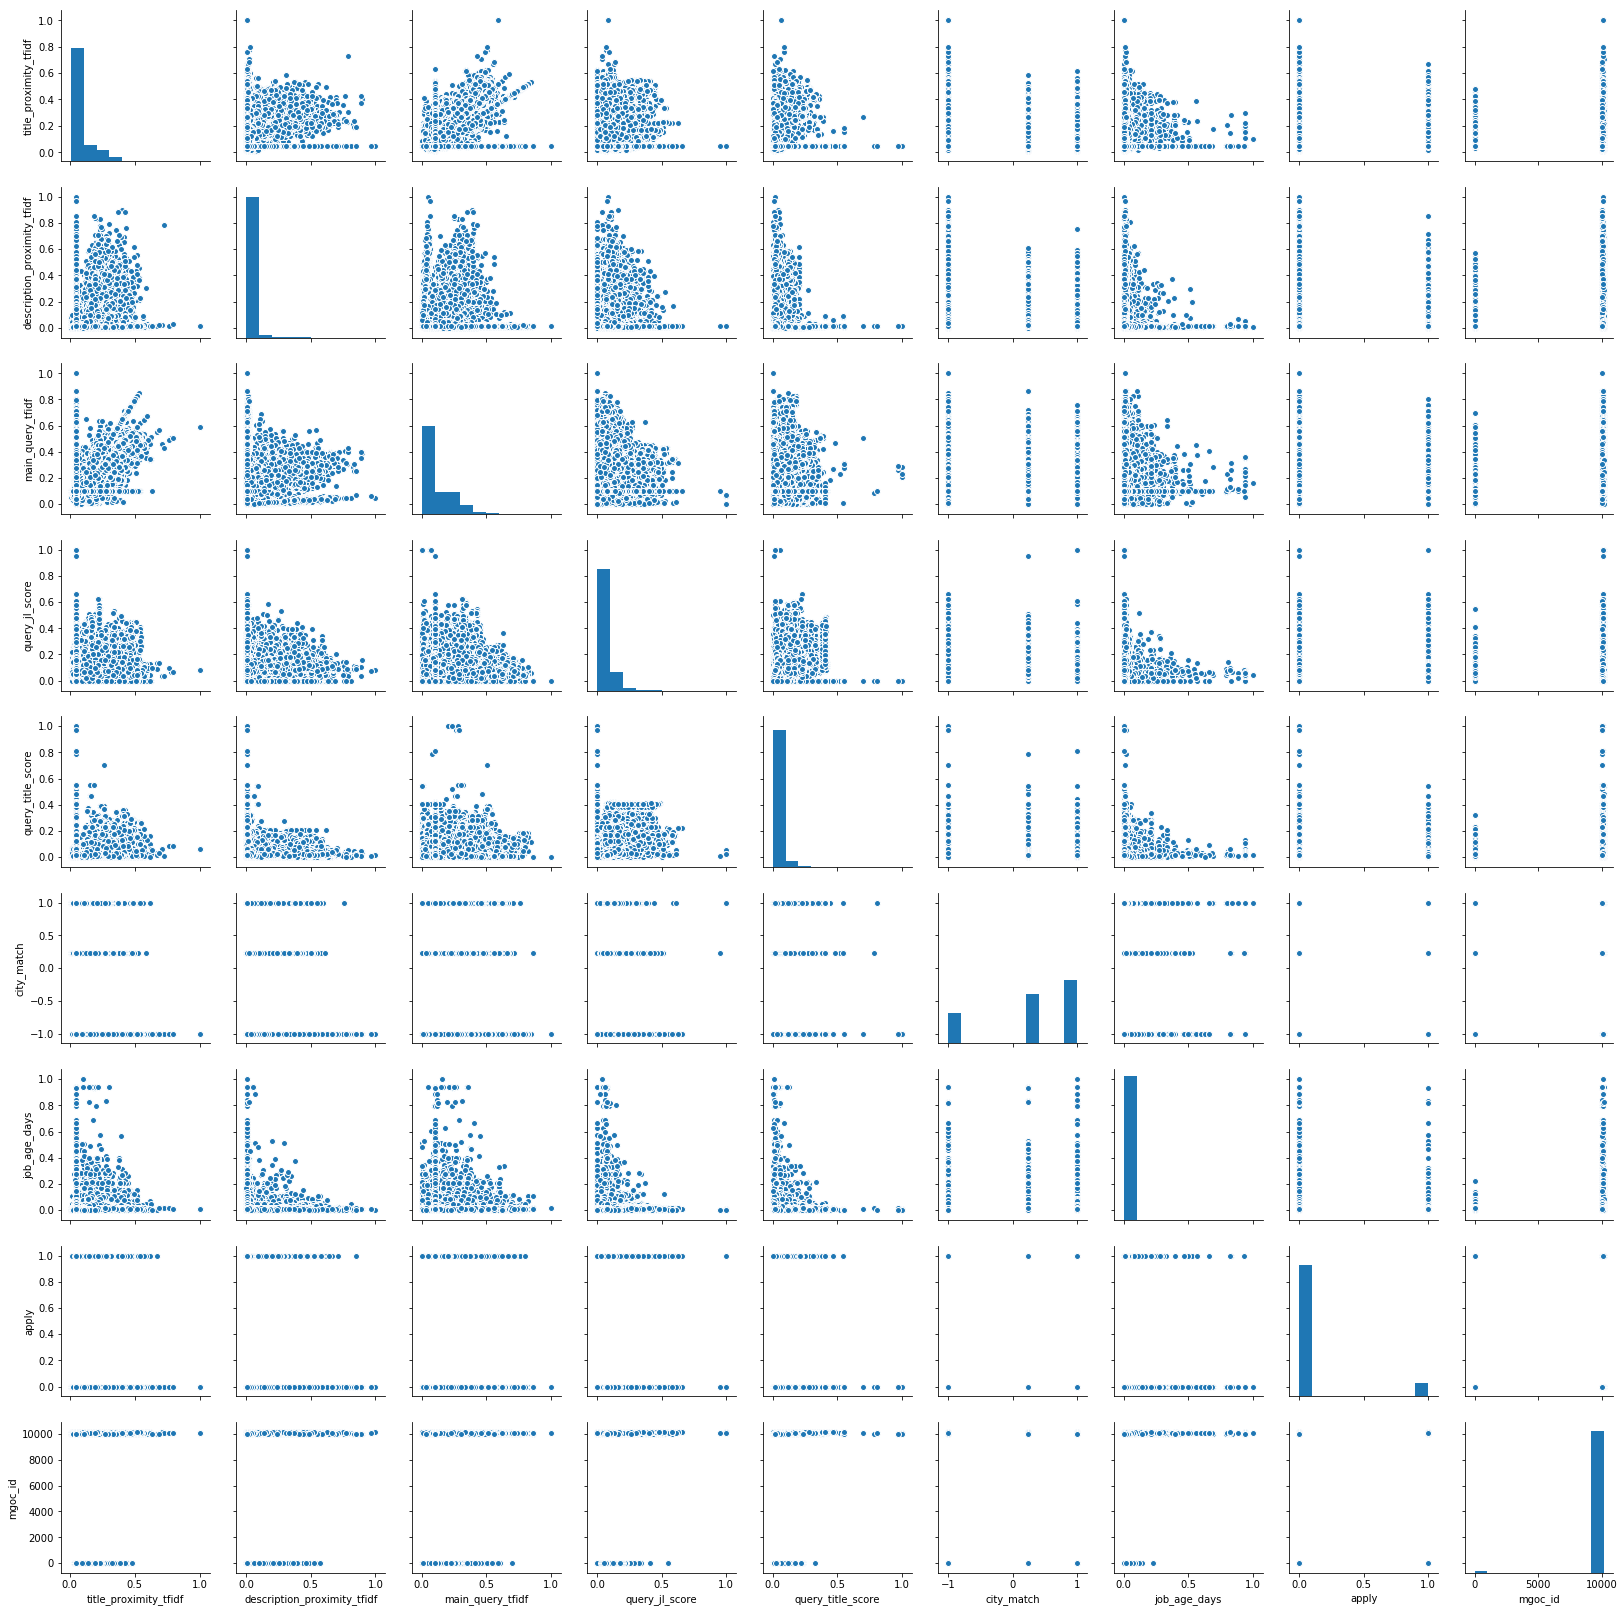

In [12]:
#pairplot to understand correlation between features of original dataset
sns.pairplot(data)
plt.show()

In [13]:
data.corr()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,mgoc_id
title_proximity_tfidf,1.000000,0.079004,0.646963,0.184320,0.385467,-0.202469,0.047908,0.051784,0.036559
description_proximity_tfidf,0.079004,1.000000,-0.045307,0.074294,-0.001054,-0.069809,0.014494,-0.000028,-0.018053
main_query_tfidf,0.646963,-0.045307,1.000000,0.064371,0.251495,-0.255150,0.068888,0.037307,0.061555
query_jl_score,0.184320,0.074294,0.064371,1.000000,0.387003,-0.137998,0.012003,0.057443,-0.003230
query_title_score,0.385467,-0.001054,0.251495,0.387003,1.000000,-0.178062,0.014175,0.063832,0.029155
city_match,-0.202469,-0.069809,-0.255150,-0.137998,-0.178062,1.000000,-0.012104,-0.013856,0.056984
job_age_days,0.047908,0.014494,0.068888,0.012003,0.014175,-0.012104,1.000000,-0.010956,-0.000118
apply,0.051784,-0.000028,0.037307,0.057443,0.063832,-0.013856,-0.010956,1.000000,0.007053
mgoc_id,0.036559,-0.018053,0.061555,-0.003230,0.029155,0.056984,-0.000118,0.007053,1.000000


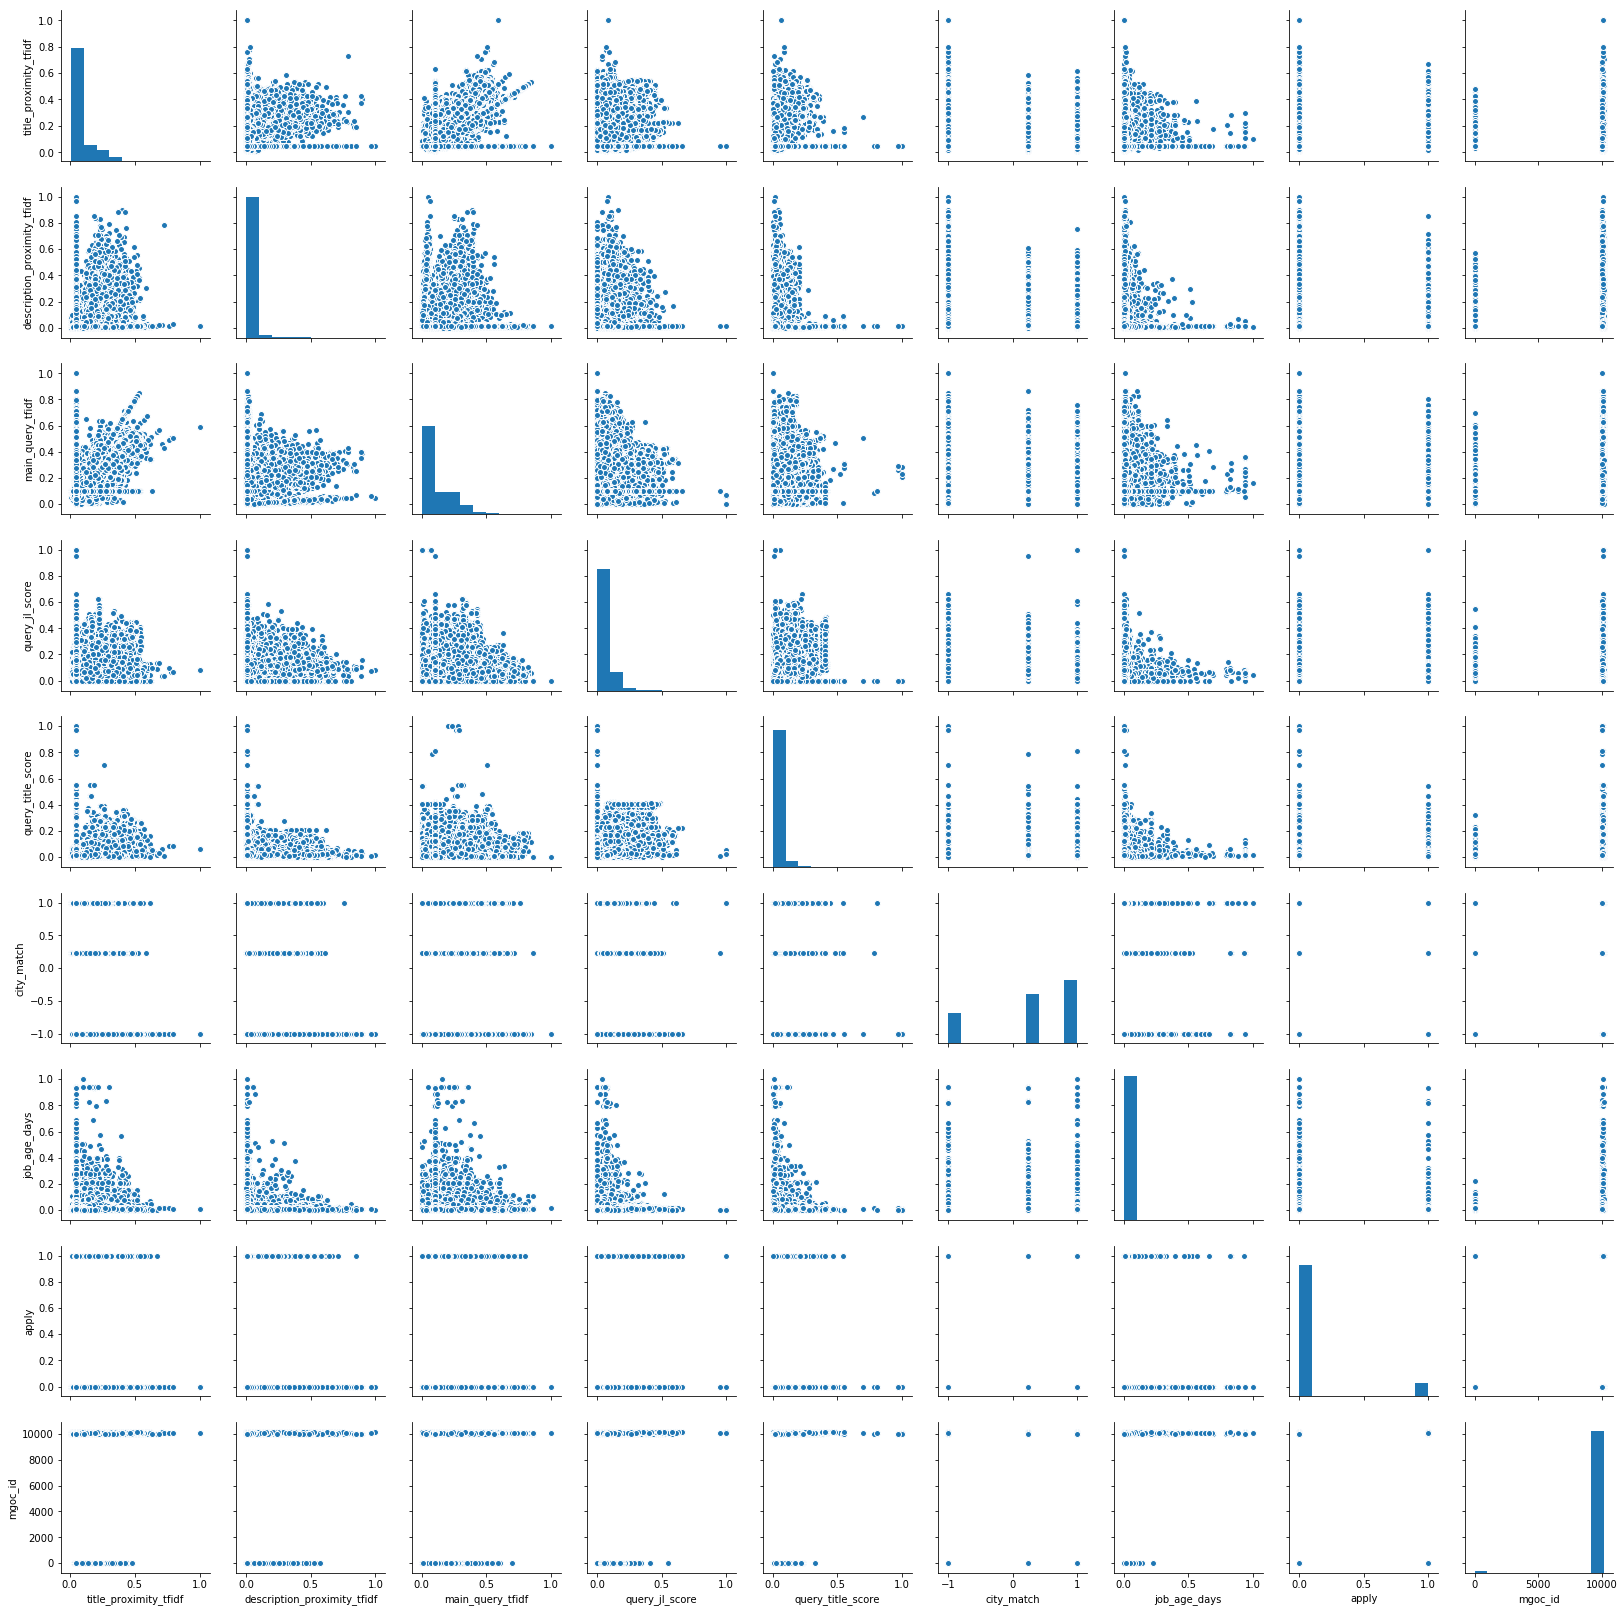

In [14]:
#pairplot to understand correlation between features of modified dataset
sns.pairplot(modified_data)
plt.show()

In [15]:
modified_data.corr()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,mgoc_id
title_proximity_tfidf,1.000000,0.079004,0.646963,0.184320,0.385467,-0.202469,0.047908,0.051784,0.036559
description_proximity_tfidf,0.079004,1.000000,-0.045307,0.074294,-0.001054,-0.069809,0.014494,-0.000028,-0.018053
main_query_tfidf,0.646963,-0.045307,1.000000,0.064371,0.251495,-0.255150,0.068888,0.037307,0.061555
query_jl_score,0.184320,0.074294,0.064371,1.000000,0.387003,-0.137998,0.012003,0.057443,-0.003230
query_title_score,0.385467,-0.001054,0.251495,0.387003,1.000000,-0.178062,0.014175,0.063832,0.029155
city_match,-0.202469,-0.069809,-0.255150,-0.137998,-0.178062,1.000000,-0.012104,-0.013856,0.056984
job_age_days,0.047908,0.014494,0.068888,0.012003,0.014175,-0.012104,1.000000,-0.010956,-0.000118
apply,0.051784,-0.000028,0.037307,0.057443,0.063832,-0.013856,-0.010956,1.000000,0.007053
mgoc_id,0.036559,-0.018053,0.061555,-0.003230,0.029155,0.056984,-0.000118,0.007053,1.000000


# Different learning models

#### Data Separation

In [16]:
#original dataset
test_data = data[data['search_date_pacific'] == "2018-01-27"]
train_data = data[data['search_date_pacific'] != "2018-01-27"]

In [17]:
#modified dataset
test_data_modified = modified_data[modified_data['search_date_pacific'] == "2018-01-27"]
train_data_modified = modified_data[modified_data['search_date_pacific'] != "2018-01-27"]

In [18]:
feature_names = ['title_proximity_tfidf', 'description_proximity_tfidf', 'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match', 'job_age_days']
target = ['apply']

In [19]:
feature_names_extra = ['title_proximity_tfidf', 'description_proximity_tfidf', 'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match', 'job_age_days', 'u_id', 'mgoc_id']

In [20]:
X_train = train_data[feature_names]
X_test = test_data[feature_names]
y_train = np.ravel(train_data[target])
y_test = np.ravel(test_data[target])

In [21]:
X_train_modified = train_data_modified[feature_names]
X_test_modified = test_data_modified[feature_names]
y_train_modified = np.ravel(train_data_modified[target])
y_test_modified = np.ravel(test_data_modified[target])

In [22]:
X_train_extra = train_data[feature_names_extra]
X_test_extra = test_data[feature_names_extra]
y_train_extra = np.ravel(train_data[target])
y_test_extra = np.ravel(test_data[target])

#### SVM Linear Classifier

In [23]:
#original dataset
model_lsvc = LinearSVC(C=5, random_state=67).fit(X_train, y_train)
print('Linear SVC coef: ', model_lsvc.coef_)
print('Linear SVC intercept: ', model_lsvc.intercept_)
print('Accuracy training: {:.3f}'.format(model_lsvc.score(X_train, y_train)))
print('Accuracy test: {:.3f}'.format(model_lsvc.score(X_test, y_test)))
y_out = model_lsvc.predict(X_test)
f1_lsvc = f1_score(y_test, y_out, average='macro')  
print("F1: ",f1_lsvc)
pf_lvc = precision_recall_fscore_support(y_test, y_out, average='macro')
print("ROC - AUC score",roc_auc_score(y_test, y_out))
print("Precision Recall F-score: ",pf_lvc)

Linear SVC coef:  [[ 0.18916452 -0.05231213  0.06728302  0.44955458  0.53471559  0.00520232
  -0.72407693]]
Linear SVC intercept:  [-0.88587091]
Accuracy training: 0.910
Accuracy test: 0.909
F1:  0.476207600263
ROC - AUC score 0.5
Precision Recall F-score:  (0.45457666100269467, 0.5, 0.47620760026251202, None)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
#modified dataset
model_lsvc = LinearSVC(C=5, random_state=67).fit(X_train_modified, y_train_modified)
print('Linear SVC coef: ', model_lsvc.coef_)
print('Linear SVC intercept: ', model_lsvc.intercept_)
print('Accuracy training: {:.3f}'.format(model_lsvc.score(X_train_modified, y_train_modified)))
print('Accuracy test: {:.3f}'.format(model_lsvc.score(X_test_modified, y_test_modified)))
y_out = model_lsvc.predict(X_test_modified)
f1_lsvc = f1_score(y_test_modified, y_out, average='macro')  
print("F1: ",f1_lsvc)
pf_lvc = precision_recall_fscore_support(y_test_modified, y_out, average='macro')
print("ROC - AUC score",roc_auc_score(y_test_modified, y_out))
print("Precision Recall F-score: ",pf_lvc)

Linear SVC coef:  [[ 0.18916452 -0.05231213  0.06728302  0.44955458  0.53471559  0.00520232
  -0.72407693]]
Linear SVC intercept:  [-0.88587091]
Accuracy training: 0.910
Accuracy test: 0.909
F1:  0.476207600263
ROC - AUC score 0.5
Precision Recall F-score:  (0.45457666100269467, 0.5, 0.47620760026251202, None)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Logistic Regression

In [25]:
# original dataset
logreg = LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.
log = logreg.fit(X_train, y_train)
y_logistic_out = log.predict(X_test)
f1_log = f1_score(y_test, y_logistic_out, average="macro")
pf_lvc = precision_recall_fscore_support(y_test, y_logistic_out, average='macro')
print('Logistic Regression coef: ', log.coef_)
print('Logistic Regression intercept: ', log.intercept_)
print('Accuracy training: {:.3f}'.format(log.score(X_train, y_train)))
print('Accuracy test: {:.3f}'.format(log.score(X_test, y_test)))
print("F1: ",f1_log)
print("Precision Recall F-score: ",pf_lvc)
print("ROC - AUC score",roc_auc_score(y_test, y_logistic_out))

Logistic Regression coef:  [[ 1.00497663 -0.23181232  0.42969678  2.48833805  2.39795446  0.04001773
  -5.58859955]]
Logistic Regression intercept:  [-2.68231608]
Accuracy training: 0.910
Accuracy test: 0.909
F1:  0.476207600263
Precision Recall F-score:  (0.45457666100269467, 0.5, 0.47620760026251202, None)
ROC - AUC score 0.5


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
# modified dataset
logreg = LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.
log = logreg.fit(X_train_modified, y_train_modified)
y_logistic_out = log.predict(X_test_modified)
f1_log = f1_score(y_test_modified, y_logistic_out, average="macro")
pf_lvc = precision_recall_fscore_support(y_test_modified, y_logistic_out, average='macro')
print('Logistic Regression coef: ', log.coef_)
print('Logistic Regression intercept: ', log.intercept_)
print('Accuracy training: {:.3f}'.format(log.score(X_train_modified, y_train_modified)))
print('Accuracy test: {:.3f}'.format(log.score(X_test_modified, y_test_modified)))
print("F1: ",f1_log)
print("Precision Recall F-score: ",pf_lvc)
print("ROC - AUC score",roc_auc_score(y_test_modified, y_logistic_out))

Logistic Regression coef:  [[ 1.00459528 -0.2259137   0.43061749  2.49109304  2.39359624  0.04004204
  -5.58222127]]
Logistic Regression intercept:  [-2.68263369]
Accuracy training: 0.910
Accuracy test: 0.909
F1:  0.476207600263
Precision Recall F-score:  (0.45457666100269467, 0.5, 0.47620760026251202, None)
ROC - AUC score 0.5


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Random Forest

In [27]:
# original dataset
rf = RandomForestClassifier(max_depth=100, random_state = 0)
rf_model = rf.fit(X_train, y_train)
y_rf_out = rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_rf_out, average="macro")
pf_rf = precision_recall_fscore_support(y_test, y_rf_out, average='macro')
print('Accuracy training: {:.3f}'.format(rf_model.score(X_train, y_train)))
print('Accuracy test: {:.3f}'.format(rf_model.score(X_test, y_test)))
print("F1: ",f1_rf)
print("Precision Recall F-score: ",pf_lvc)
print("ROC - AUC score",roc_auc_score(y_test, y_rf_out))

Accuracy training: 0.914
Accuracy test: 0.908
F1:  0.479314930626
Precision Recall F-score:  (0.45457666100269467, 0.5, 0.47620760026251202, None)
ROC - AUC score 0.500827294562


In [28]:
# modified dataset
rf = RandomForestClassifier(max_depth=100, random_state = 0)
rf_model = rf.fit(X_train_modified, y_train_modified)
y_rf_out = rf_model.predict(X_test_modified)
f1_rf = f1_score(y_test_modified, y_rf_out, average="macro")
pf_rf = precision_recall_fscore_support(y_test_modified, y_rf_out, average='macro')
print('Accuracy training: {:.3f}'.format(rf_model.score(X_train_modified, y_train_modified)))
print('Accuracy test: {:.3f}'.format(rf_model.score(X_test_modified, y_test_modified)))
print("F1: ",f1_rf)
print("Precision Recall F-score: ",pf_lvc)
print("ROC - AUC score",roc_auc_score(y_test_modified, y_rf_out))

Accuracy training: 0.914
Accuracy test: 0.908
F1:  0.479314930626
Precision Recall F-score:  (0.45457666100269467, 0.5, 0.47620760026251202, None)
ROC - AUC score 0.500827294562


#### Neural Network

In [29]:
# original dataset
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn_model = clf.fit(X_train, y_train)                         
y_nn_out = nn_model.predict(X_test)
f1_nn = f1_score(y_test, y_nn_out, average = "macro")
pf_nn = precision_recall_fscore_support(y_test, y_nn_out, average='macro')
print('Accuracy training: {:.3f}'.format(nn_model.score(X_train, y_train)))
print('Accuracy test: {:.3f}'.format(nn_model.score(X_test, y_test)))
print("F1: ",f1_nn)
print("Precision Recall F-score: ",pf_nn)
print("ROC - AUC score",roc_auc_score(y_test, y_nn_out))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy training: 0.910
Accuracy test: 0.909
F1:  0.476207600263
Precision Recall F-score:  (0.45457666100269467, 0.5, 0.47620760026251202, None)
ROC - AUC score 0.5


In [30]:
# modified dataset
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn_model = clf.fit(X_train_modified, y_train_modified)                         
y_nn_out = nn_model.predict(X_test_modified)
f1_nn = f1_score(y_test_modified, y_nn_out, average = "macro")
pf_nn = precision_recall_fscore_support(y_test_modified, y_nn_out, average='macro')
print('Accuracy training: {:.3f}'.format(nn_model.score(X_train_modified, y_train_modified)))
print('Accuracy test: {:.3f}'.format(nn_model.score(X_test_modified, y_test_modified)))
print("F1: ",f1_nn)
print("Precision Recall F-score: ",pf_nn)
print("ROC - AUC score",roc_auc_score(y_test_modified, y_nn_out))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy training: 0.910
Accuracy test: 0.909
F1:  0.476207600263
Precision Recall F-score:  (0.45457666100269467, 0.5, 0.47620760026251202, None)
ROC - AUC score 0.5


In [31]:
# original dataset
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)
nn_model = clf.fit(X_train, y_train)                         
y_nn_out = nn_model.predict(X_test)
f1_nn = f1_score(y_test, y_nn_out, average = "macro")
pf_nn = precision_recall_fscore_support(y_test, y_nn_out, average='macro')
print('Accuracy training: {:.3f}'.format(nn_model.score(X_train, y_train)))
print('Accuracy test: {:.3f}'.format(nn_model.score(X_test, y_test)))
print("F1: ",f1_nn)
print("Precision Recall F-score: ",pf_nn)
print("ROC - AUC score",roc_auc_score(y_test, y_nn_out))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy training: 0.910
Accuracy test: 0.909
F1:  0.476207600263
Precision Recall F-score:  (0.45457666100269467, 0.5, 0.47620760026251202, None)
ROC - AUC score 0.5


#### Analysis of adding Job Id to dataset

In [36]:
data.columns

Index(['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match',
       'job_age_days', 'apply', 'search_date_pacific', 'u_id', 'mgoc_id'],
      dtype='object')

In [37]:
len(data[data['apply']==1]['mgoc_id'])==len(data[data['apply']==0]['mgoc_id'])

False

In [38]:
len(data['mgoc_id'].unique())

157

In [39]:
series_1=data[data['apply']==1]['mgoc_id'].value_counts()

In [40]:
l=[]
for i in series_1:
    l.append(pd.Index(series_1).get_loc(i))
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, F

In [44]:
series_0=data[data['apply']==0]['mgoc_id'].value_counts()

In [ ]:
len(series_0)

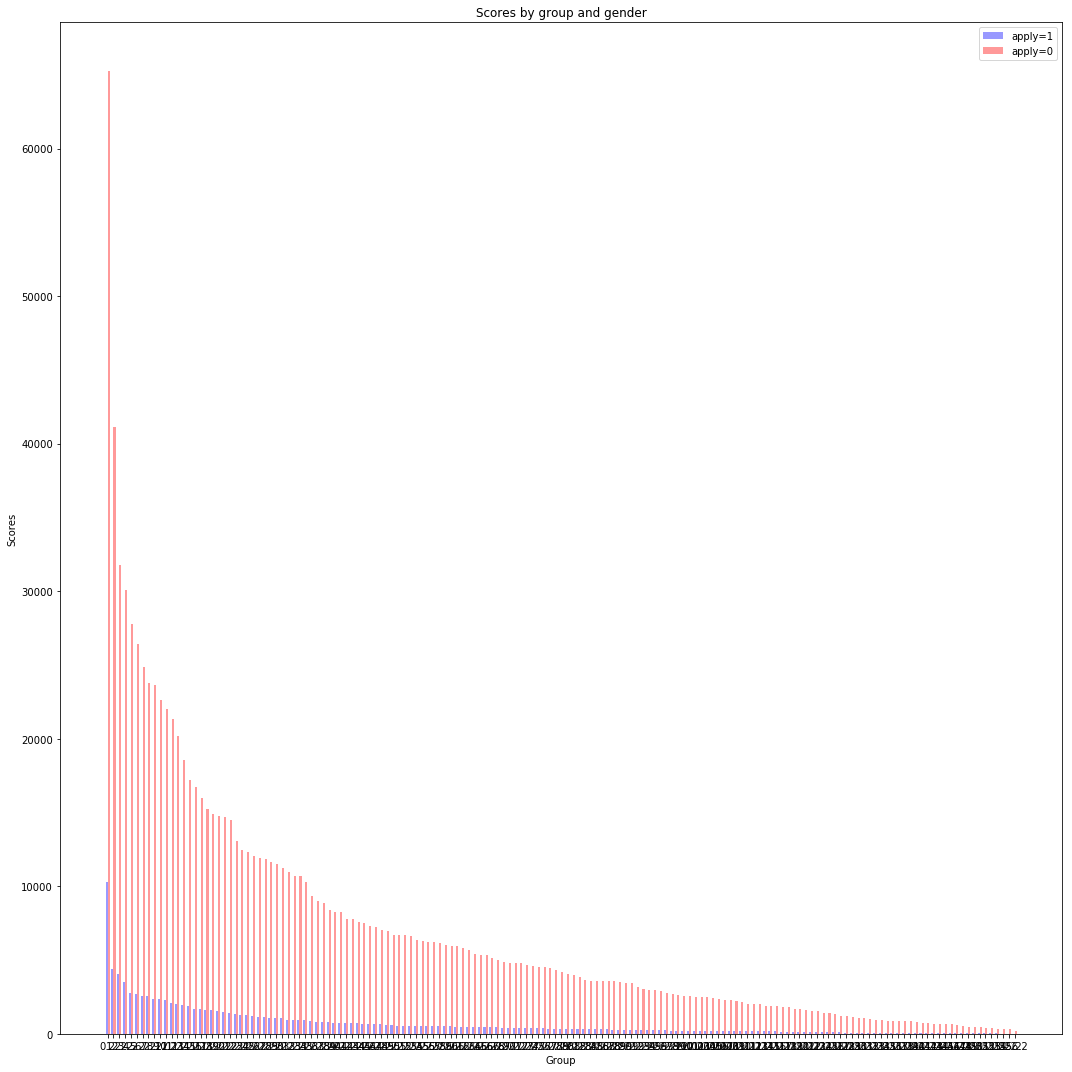

In [43]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

index = np.arange(len(data['mgoc_id'].unique()))
bar_width = 0.35
#figure(figsize=(15,15))
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index,series_1, bar_width,
                alpha=opacity, color='b',
                 error_kw=error_config,
                label='apply=1')

rects2 = ax.bar(index + bar_width, series_0, bar_width,
                alpha=opacity, color='r',
                 error_kw=error_config,
                label='apply=0')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
#ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()